<a href="https://colab.research.google.com/github/thalassa1/Portfolio/blob/main/Correlation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots

In [2]:
#Reading the data from csv
df = pd.read_csv('/content/drive/MyDrive/movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
#Exploring the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Check if there's missing data

for col in df.columns:
  pct_missing = np.mean(df[col].isnull()) * 100
  print(f'The percent of missing data in column {col} is {pct_missing:.2f}%')

The percent of missing data in column name is 0.00%
The percent of missing data in column rating is 1.00%
The percent of missing data in column genre is 0.00%
The percent of missing data in column year is 0.00%
The percent of missing data in column released is 0.03%
The percent of missing data in column score is 0.04%
The percent of missing data in column votes is 0.04%
The percent of missing data in column director is 0.00%
The percent of missing data in column writer is 0.04%
The percent of missing data in column star is 0.01%
The percent of missing data in column country is 0.04%
The percent of missing data in column budget is 28.31%
The percent of missing data in column gross is 2.46%
The percent of missing data in column company is 0.22%
The percent of missing data in column runtime is 0.05%


In [5]:
#dropping the rows with null values
df = df.dropna()

In [6]:
#Checking the data type of each column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#Changing data types to integers

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

<ipython-input-7-52d5fb222606>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'] = df['budget'].astype('int64')
<ipython-input-7-52d5fb222606>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross'] = df['gross'].astype('int64')


In [8]:
#Drop column year
df = df.drop('year', axis=1)

In [9]:
#Creating a new column with correct release year
df['year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [10]:
#Order by gross revenue
df.sort_values(by='gross', inplace=False, ascending=False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [ ]:
#Display all rows
pd.set_option('display.max_rows', None)

In [11]:
# Drop any duplicates
df = df.drop_duplicates()

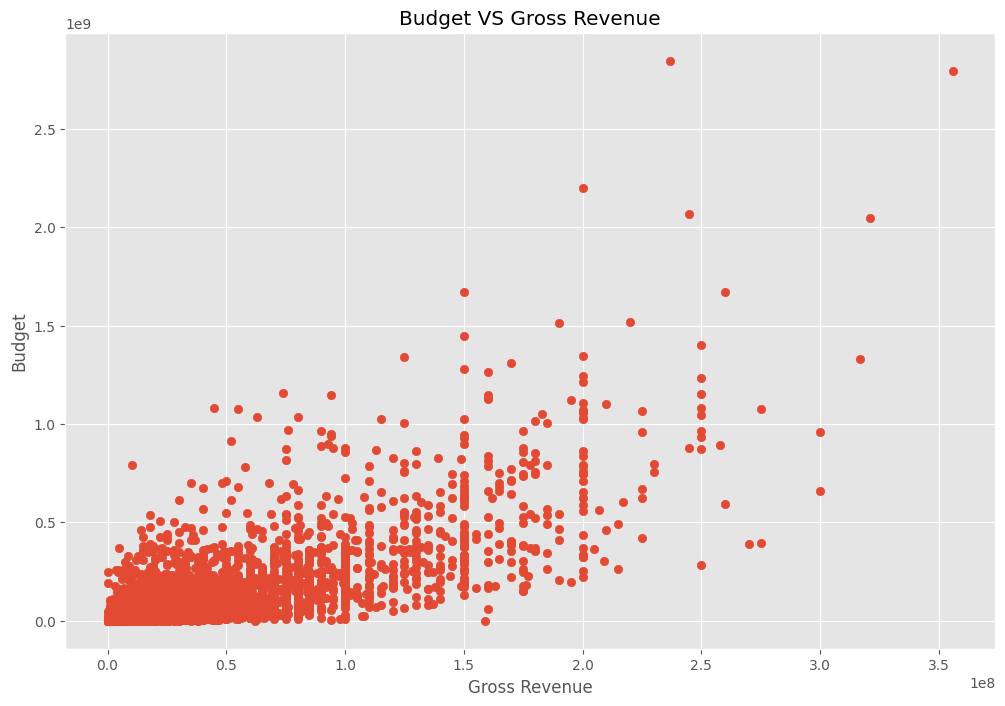

In [14]:
#Scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget VS Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Budget')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

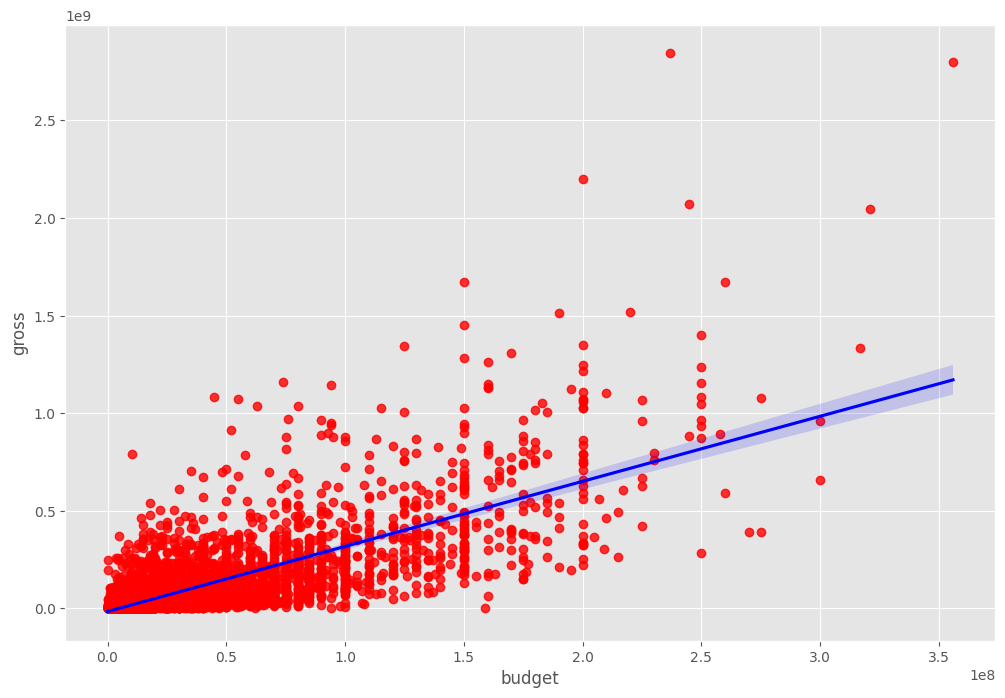

In [16]:
#Regression plot for Budget vs Gross

sns.regplot(df, x='budget', y='gross', scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [17]:
#Determine correlation
#Pearson by default
df.corr()

<ipython-input-17-38b7ca9a6001>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,score,votes,budget,gross,runtime,year
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [18]:
#High correlation between budget and gross

<ipython-input-20-0da53c1b8cee>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


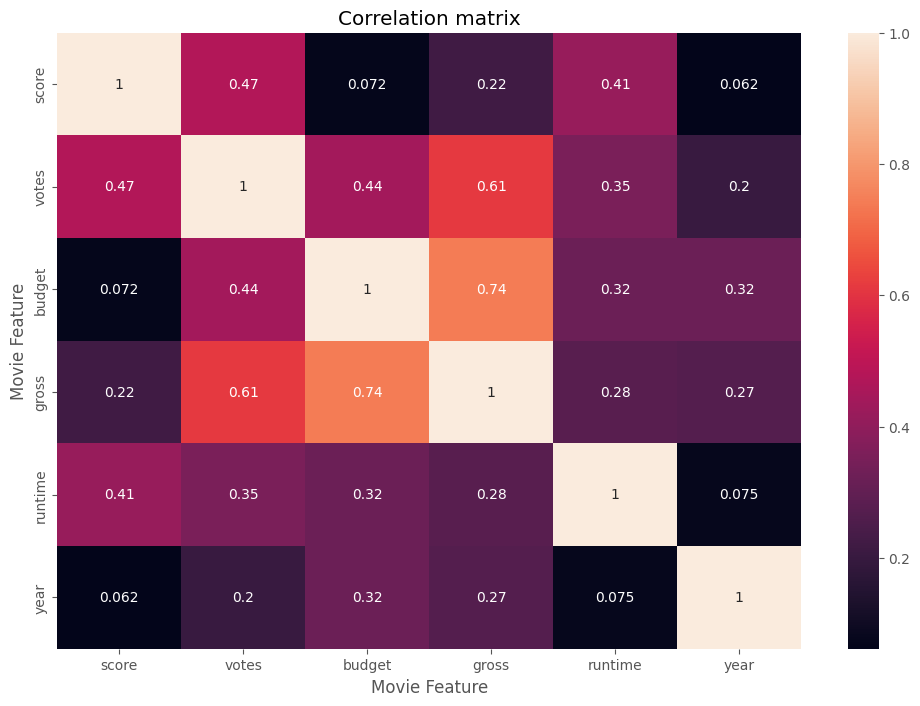

In [20]:
#Creating correlation matrix

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show()

In [23]:
#Turning company column into int to check correlation between company vs gross revenue

df_numerized = df

for col in df_numerized.columns:
  if df_numerized[col].dtype == 'object':
    df_numerized[col] = df_numerized[col].astype('category')
    df_numerized[col] = df_numerized[col].cat.codes

In [24]:
df_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,6,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,The Blue Lagoon,R,1,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,0,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,Airplane!,PG,4,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,Caddyshack,R,4,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,0,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,2020
7649,Sonic the Hedgehog,PG,0,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,2020
7650,Dolittle,PG,1,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,2020
7651,The Call of the Wild,PG,1,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,2020


<ipython-input-25-b791af3438a7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_numerized.corr()


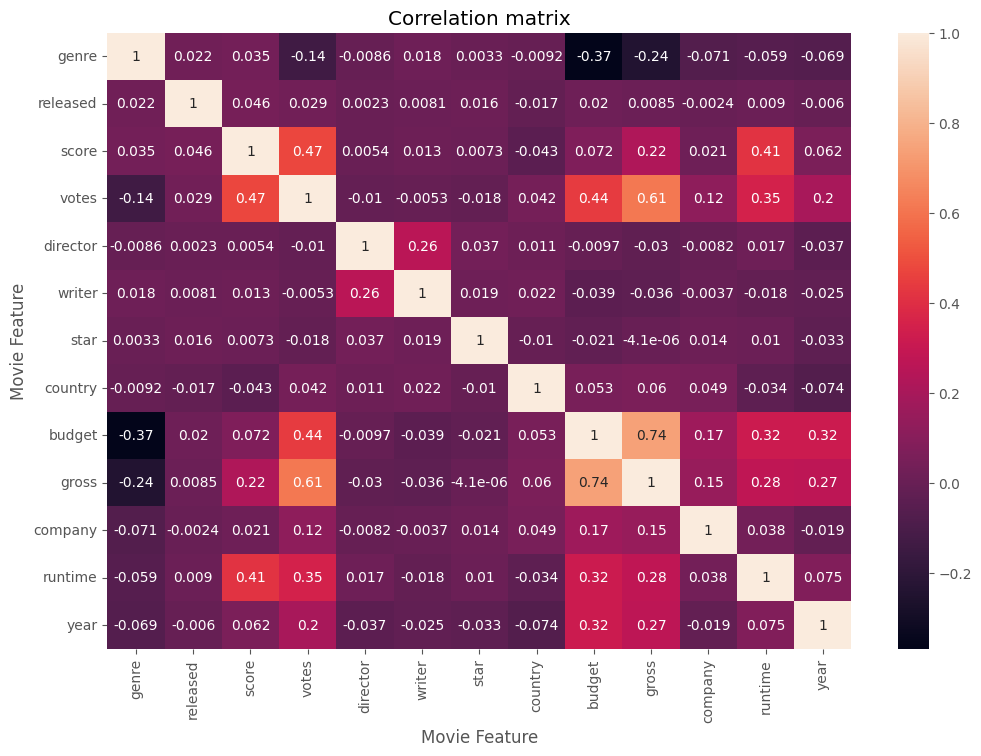

In [25]:
#Creating correlation matrix for categories

corr_matrix = df_numerized.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show()

In [30]:
#Unstacking correlation matrix to better see the results
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs = corr_pairs.sort_values(ascending=False)
corr_pairs

<ipython-input-30-cf3f53decee3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_numerized.corr()


genre     genre       1.000000
released  released    1.000000
runtime   runtime     1.000000
company   company     1.000000
gross     gross       1.000000
                        ...   
votes     genre      -0.135990
genre     gross      -0.244101
gross     genre      -0.244101
budget    genre      -0.368523
genre     budget     -0.368523
Length: 169, dtype: float64

In [35]:
#Picking only high correlation but not to itself

high_corr = corr_pairs[(corr_pairs>0.5) & (corr_pairs <1)]
high_corr

gross   budget    0.740247
budget  gross     0.740247
gross   votes     0.614751
votes   gross     0.614751
dtype: float64

In [36]:
#Votes and budget have high correlation to gross revenue